In [1]:
network = {
    'Buchaest':{
        'Urziceni': 85,
        'Fagaras': 211,
        'Pitesti': 101,
        'Giurgiu': 90,
        'BaseCost': 0
    },
    'Urziceni':{
        'Buchaest': 85,
        'Hirsova': 98,
        'Vaslui': 142,
        'BaseCost': 80
    },
    'Hirsova':{
        'Urziceni': 98,
        'Eforie': 86,
        'BaseCost': 135
    },
    'Eforie':{
        'Hirsova': 86,
        'BaseCost': 150
    },
    'Vaslui':{
        'Urziceni': 142,
        'Iasi': 92,
        'BaseCost': 199
    },
    'Iasi':{
        'Vaslui': 92,
        'Neamt': 87,
        'BaseCost': 226
    },
    'Neamt':{
        'Iasi': 87,
        'BaseCost': 234
    },
    'Fagaras':{
        'Buchaest': 211,
        'Sibiu': 99,
        'BaseCost': 175
    },
    'Sibiu':{
        'Fagaras': 99,
        'Rimnicu Vilcea': 80,
        'Oradea': 151,
        'Arad': 140,
        'BaseCost': 250
    },
    'Rimnicu Vilcea':{
        'Sibiu': 80,
        'Pitesti': 97,
        'Craiova': 146,
        'BaseCost': 193
    },
    'Pitesti':{
        'Buchaest': 101,
        'Rimnicu Vilcea': 97,
        'Craiova': 138,
        'BaseCost': 20
    },
    'Craiova':{
        'Rimnicu Vilcea': 146,
        'Pitesti': 138,
        'Drobeta': 120,
        'BaseCost': 150
    },
    'Drobeta':{
        'Craiova': 120,
        'Mehadia': 75,
        'BaseCost': 242
    },
    'Mehadia':{
        'Drobeta': 75,
        'Lugoj': 70,
        'BaseCost': 240
    },
    'Lugoj':{
        'Mehadia': 70,
        'Timisoara': 111,
        'BaseCost': 244
    },
    'Timisoara':{
        'Lugoj': 111,
        'Arad': 118,
        'BaseCost': 331
    },
    'Arad':{
        'Timisoara': 118,
        'Sibiu': 140,
        'Zerind': 75,
        'BaseCost': 366
    },
    'Zerind':{
        'Arad': 75,
        'Oradea': 71,
        'BaseCost': 374
    },
    'Oradea':{
        'Zerind': 71,
        'Sibiu': 151,
        'BaseCost': 380
    },
    'Giurgiu':{
        'Buchaest': 90,
        'BaseCost': 70
    }
}

In [27]:
def print_table(loop, current_node, gamma, open_list, close_list):
    if loop == 0:
        print(f"{'Loop':<6} | {'Current Node':<13} | {'Gamma':<70} | {'Open':70} | {'Close':<30}")
        print('-' * 110)
    
    print(f"{loop:<6} | {str(current_node):<13} | {str(gamma):<70} | {str(open_list):<70} | {str(close_list):<30}")


In [29]:
def AStar(network, start, end):
    open_list = set([start])
    close_list = set([])

    g = {node: float('inf') for node in network}
    g[start] = 0

    parents = {start: None}

    loop = 0
    print_table(loop, '', '', start + ' (' + str(network[start]['BaseCost']) + ')', '')
    
    while len(open_list) > 0:
        loop += 1

        # Chọn node trong open_list có f = g + h nhỏ nhất
        current_node = min(open_list, key=lambda node: g[node] + network[node]['BaseCost'])

        # In thông tin vòng lặp
        gamma = []
        for neighbor in network[current_node]:
            if neighbor != 'BaseCost':
                f_value = g[current_node] + network[current_node][neighbor] + network[neighbor]['BaseCost']
                gamma.append(f"{neighbor} ({f_value})")

        print_table(loop, current_node, gamma, open_list, close_list)

        if current_node == end:
            # Truy vết đường đi
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = parents[current_node]
            path.reverse()
            print(f"Path found: {' -> '.join(path)}")
            return True
        
        open_list.remove(current_node)
        close_list.add(current_node)

        # Xét các node kề
        for neighbor in network[current_node]:
            if neighbor == 'BaseCost':
                continue

            if neighbor in close_list:
                continue

            tentative_g = g[current_node] + network[current_node][neighbor]

            if neighbor not in open_list:
                open_list.add(neighbor)
            elif tentative_g >= g[neighbor]:
                continue

            parents[neighbor] = current_node
            g[neighbor] = tentative_g

        if loop > 1000:
            print("Loop limit exceeded")
            return False

    print("Path not found")
    return False

# Chạy thử lại với start = 'Lugoj', end = 'Buchaest'
AStar(network, 'Arad', 'Buchaest')


Loop   | Current Node  | Gamma                                                                  | Open                                                                   | Close                         
--------------------------------------------------------------------------------------------------------------
0      |               |                                                                        | Arad (366)                                                             |                               
1      | Arad          | ['Timisoara (449)', 'Sibiu (390)', 'Zerind (449)']                     | {'Arad'}                                                               | set()                         
2      | Sibiu         | ['Fagaras (414)', 'Rimnicu Vilcea (413)', 'Oradea (671)', 'Arad (646)'] | {'Zerind', 'Timisoara', 'Sibiu'}                                       | {'Arad'}                      
3      | Rimnicu Vilcea | ['Sibiu (550)', 'Pitesti (337)', 'Craiova (516)']     

True

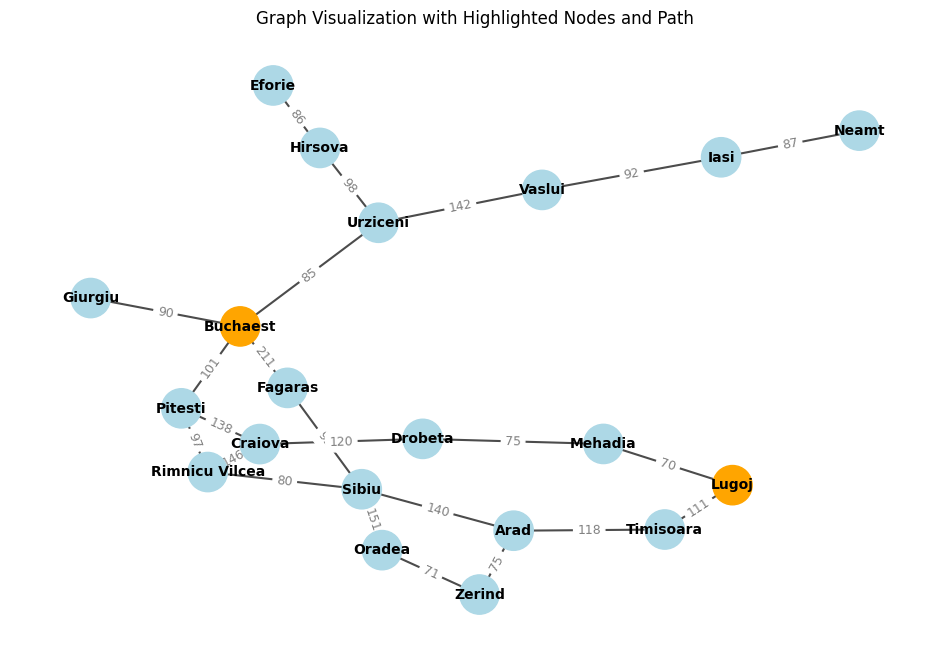

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(network, highlight_nodes=None, path=None):
    """
    Visualize the graph.
    
    Args:
        network (dict): Graph data as adjacency with costs and BaseCost heuristic.
        highlight_nodes (list or set): List of nodes to highlight (e.g. start and end).
        path (list): Optional. List of nodes representing a path to highlight.
    """
    G = nx.Graph()
    
    # Thêm các cạnh vào đồ thị
    for node, edges in network.items():
        for neighbor, cost in edges.items():
            if neighbor != 'BaseCost':
                # Đảm bảo thêm chiều ngược lại, tránh lặp lại
                if not G.has_edge(node, neighbor):
                    G.add_edge(node, neighbor, weight=cost)
                    
    pos = nx.spring_layout(G, seed=42)  # Tính layout
    
    plt.figure(figsize=(12, 8))
    
    # Vẽ node thường
    node_colors = []
    for node in G.nodes():
        if highlight_nodes and node in highlight_nodes:
            node_colors.append('orange')  # Màu nổi bật cho các điểm highlight
        else:
            node_colors.append('lightblue')
    
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    
    # Vẽ các cạnh
    nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.7)
    
    # Vẽ nhãn trọng số cạnh
    edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='gray', font_size=9)
    
    # Nếu có đường đi, vẽ đường đi này đậm và màu khác
    if path is not None and len(path) > 1:
        # Tạo danh sách cạnh theo đường đi
        path_edges = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=4, edge_color='red')
    
    plt.title("Graph Visualization with Highlighted Nodes and Path")
    plt.axis('off')
    plt.show()

# Ví dụ dùng hàm với 2 điểm nổi bật 'Lugoj' và 'Buchaest' (Bucharest)
highlight_points = ['Lugoj', 'Buchaest']
visualize_graph(network, highlight_nodes=highlight_points)
